# Bitcoin Price Prediction with Historical Data
### 1 minute time interval OHLC data from Jan 2012 to December 2020

#### Source of Data:
https://www.kaggle.com/mczielinski/bitcoin-historical-data

### Knowing the Data:
#### Columns and Rows: 47,27,777 rows x 8 columns
#### Column Data Types: Decimal (7) and Integer (1)

## We will be training our model to predict weghted price of btc

In [1]:
# Importing external Libraries
import pandas as pd

In [2]:
# Loading the dataset
bitcoin_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

# Describing the Data

### Begining and Ending of Dataset

In [3]:
bitcoin_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


### Major Statistics

In [4]:
# Major Statistics Calculations
print(bitcoin_df.describe())

          Timestamp          Open          High           Low         Close  \
count  4.727777e+06  3.484305e+06  3.484305e+06  3.484305e+06  3.484305e+06   
mean   1.467409e+09  4.570658e+03  4.573721e+03  4.567413e+03  4.570624e+03   
std    8.203749e+07  4.775105e+03  4.778620e+03  4.771352e+03  4.775094e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.396235e+09  4.321900e+02  4.324300e+02  4.320000e+02  4.322000e+02   
50%    1.467540e+09  3.085010e+03  3.093250e+03  3.078010e+03  3.084410e+03   
75%    1.538456e+09  8.158010e+03  8.162850e+03  8.152790e+03  8.157310e+03   
max    1.609373e+09  2.899738e+04  2.901032e+04  2.896366e+04  2.899738e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.484305e+06       3.484305e+06    3.484305e+06  
mean   9.422676e+00       3.315691e+04    4.570625e+03  
std    3.101255e+01       1.129107e+05    4.775090e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%

### Data Type details

In [5]:
# Data type details of the columns
print(bitcoin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727777 entries, 0 to 4727776
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 288.6 MB
None


# Cleaning the Data

## Finding the Missing values

In [6]:
print(bitcoin_df.apply(lambda x: sum(x.isnull()),axis=0))

Timestamp                  0
Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64


## Replacing the Missing values

In [7]:
bitcoin_df['Open'].fillna(bitcoin_df['Open'].mean(), inplace=True)
bitcoin_df['High'].fillna(bitcoin_df['High'].mean(), inplace=True)
bitcoin_df['Low'].fillna(bitcoin_df['Low'].mean(), inplace=True)
bitcoin_df['Close'].fillna(bitcoin_df['Close'].mean(), inplace=True)
bitcoin_df['Volume_(BTC)'].fillna(bitcoin_df['Volume_(BTC)'].mean(), inplace=True)
bitcoin_df['Volume_(Currency)'].fillna(bitcoin_df['Volume_(Currency)'].mean(), inplace=True)

# this is our target column
bitcoin_df['Weighted_Price'].fillna(bitcoin_df['Weighted_Price'].mean(), inplace=True)

## Final Check for Missing values

In [8]:
print(bitcoin_df.apply(lambda x: sum(x.isnull()),axis=0))

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


## Dropping the duplicate values

In [9]:
bitcoin_df.drop_duplicates(inplace=True)

## Setting up index

In [10]:
bitcoin_df.set_index('Timestamp', inplace=True)

## Test Export

In [11]:
bitcoin_df.to_csv("btc_train_ready_improved.csv")

## Checking the Test Export File

In [12]:
bitcoin_df_test = pd.read_csv("btc_train_ready_improved.csv")

In [14]:
bitcoin_df_test

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000
1,1325317980,4570.657932,4573.720783,4567.413236,4570.623968,9.422676,33156.907444,4570.625160
2,1325318040,4570.657932,4573.720783,4567.413236,4570.623968,9.422676,33156.907444,4570.625160
3,1325318100,4570.657932,4573.720783,4567.413236,4570.623968,9.422676,33156.907444,4570.625160
4,1325318160,4570.657932,4573.720783,4567.413236,4570.623968,9.422676,33156.907444,4570.625160
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.470000,28829.420000,28785.640000,28829.420000,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.420000,28863.900000,28829.420000,28857.060000,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.490000,28900.520000,28850.490000,28882.820000,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.540000,28911.520000,28867.600000,28881.300000,7.332773,211870.912660,28893.695831


# Training the Model

## Define X (independent variable(s) and Y (dependent variable)

In [15]:
X = bitcoin_df.drop(['Weighted_Price'], axis=1).values
Y = bitcoin_df['Weighted_Price'].values

In [16]:
print(X)

[[4.39000000e+00 4.39000000e+00 4.39000000e+00 4.39000000e+00
  4.55580870e-01 2.00000002e+00]
 [4.57065793e+03 4.57372078e+03 4.56741324e+03 4.57062397e+03
  9.42267650e+00 3.31569074e+04]
 [4.57065793e+03 4.57372078e+03 4.56741324e+03 4.57062397e+03
  9.42267650e+00 3.31569074e+04]
 ...
 [2.88504900e+04 2.89005200e+04 2.88504900e+04 2.88828200e+04
  2.46658976e+00 7.12327845e+04]
 [2.89105400e+04 2.89115200e+04 2.88676000e+04 2.88813000e+04
  7.33277300e+00 2.11870913e+05]
 [2.88932100e+04 2.89284900e+04 2.88932100e+04 2.89284900e+04
  5.75767938e+00 1.66449709e+05]]


In [17]:
print(Y)

[4.39000000e+00 4.57062516e+03 4.57062516e+03 ... 2.88790563e+04
 2.88936958e+04 2.89091661e+04]


## Split dataset into training and test sets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Train the model on the training set

In [19]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

## Predict the test set results

In [20]:
y_predicted = ml.predict(x_test)
print(y_predicted)

[ 4570.62440088 11890.18500916   237.54512254 ...    97.50863279
  4570.62440088  4570.62440088]


In [21]:
# testing second row of the dataset
ml.predict([[4570.657932, 4573.720783, 4567.413236, 4570.623968, 9.422676, 33156.907444]])

array([4570.62440097])

## Evaluate the model

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

0.9999996835405817

## Plot the results

Text(0.5, 1.0, 'Actual vs Predicted')

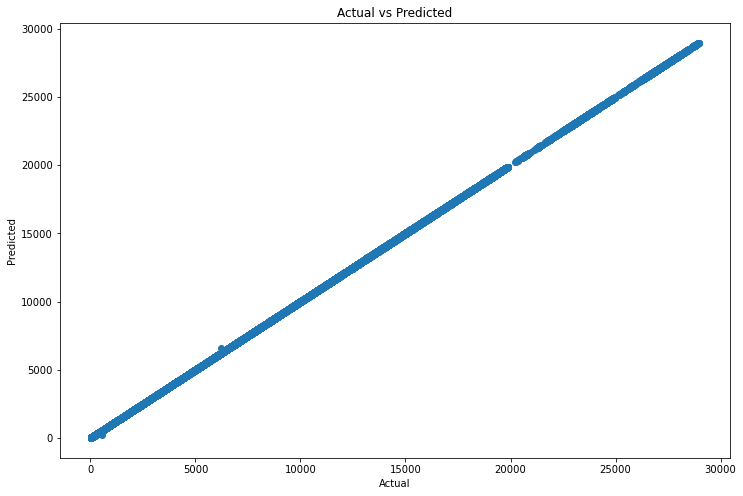

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

## Predicted values

In [24]:
predicted_y_diff = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predicted, 'Difference':y_test-y_predicted})
predicted_y_diff

,Actual Value,Predicted Value,Difference
0,4570.625160,4570.624401,0.000759
1,11886.201906,11890.185009,-3.983103
2,237.580000,237.545123,0.034877
3,4570.625160,4570.624401,0.000759
4,393.400573,393.310561,0.090012
...,...,...,...
1418329,118.488095,118.442385,0.045710
1418330,3367.837939,3367.692086,0.145852
1418331,97.550000,97.508633,0.041367
1418332,4570.625160,4570.624401,0.000759


# This model has 99.99% Accuracy